In [ ]:
import os 
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the output directory exists
output_dir = "./Figures & Tables"

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman', 'Times', 'Palatino', 'serif']

In [2]:
# Load Data
df = pd.read_stata("./Data/project level data.dta")

# Filter for relevant years
df = df.loc[(df['release_year'] >= 1990)&(df['release_year']<=2018)].copy()

# Create calculated columns
df['AnyMiddleware'] = np.maximum(df['INHOUSE'], df['MIDDLE'])
df['Groups'] = np.where(df['SHOOTER'] == 1, "SHOOTER GAMES", "OTHER GENRES")
df['npd_supergenre'] = np.where(df['npd_supergenre'] == 'OTHER GAMES/COMPILATIONS', 'OTHER GAMES', df['npd_supergenre'])

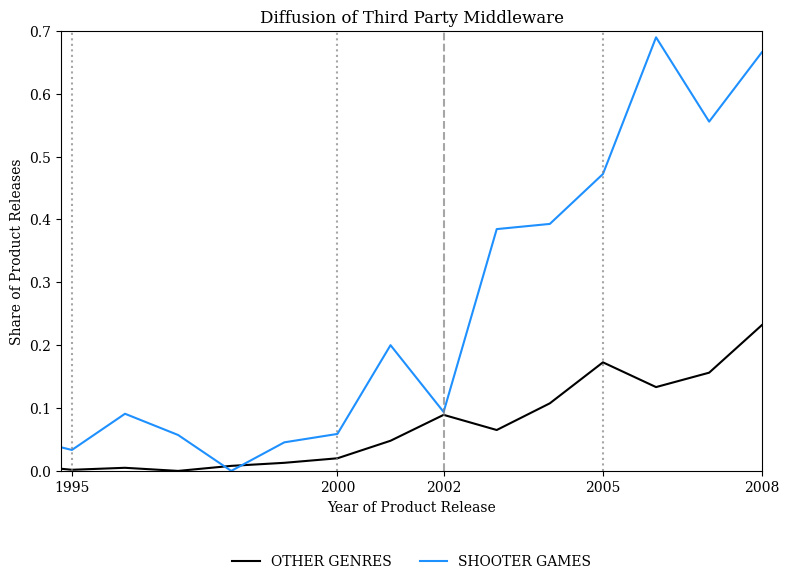

In [3]:
plt.figure(figsize=(8, 6))

sns.lineplot(data = df, 
             x = 'release_year', 
             y = 'MIDDLE', 
             hue = 'Groups',
             palette= ['black', 'dodgerblue'],
             estimator = np.mean,
             errorbar=None) 

plt.xticks([1995, 2000, 2002, 2005, 2008])
plt.xlim(1994.8, 2008) 
plt.ylim(0, 0.7)

plt.legend(title=None,
           loc='lower center', 
           bbox_to_anchor=(0.5, -0.25), 
           ncol=2, 
           frameon=False)

plt.xlabel("Year of Product Release")
plt.ylabel("Share of Product Releases")
plt.title("Diffusion of Third Party Middleware")

plt.axvline(1995, linestyle=':', color='grey', alpha=0.7)
plt.axvline(2000, linestyle=':', color='grey', alpha=0.7)
plt.axvline(2002, linestyle='--', color='grey', alpha=0.7)
plt.axvline(2005, linestyle=':', color='grey', alpha=0.7)

plt.tight_layout()

# Save Figure
plt.savefig(f"{output_dir}/Middleware_Share_Over_Time.png", dpi=300, bbox_inches='tight')
plt.show()

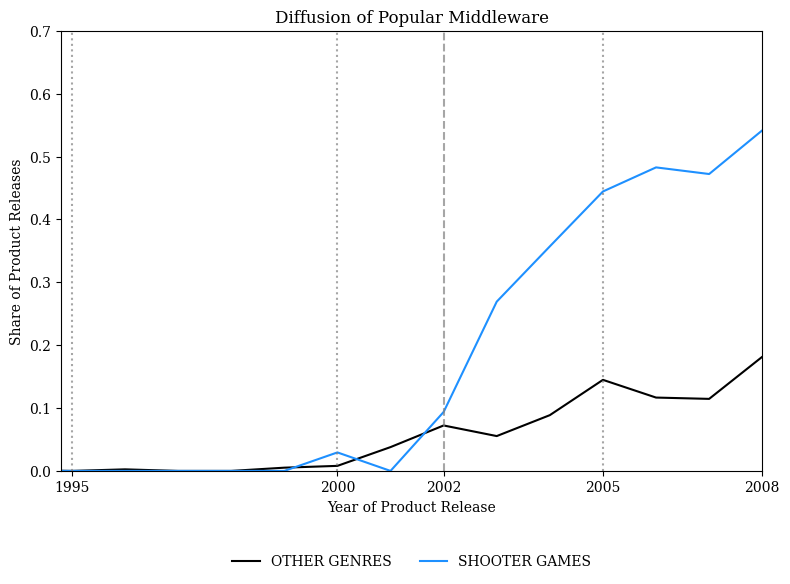

In [4]:
plt.figure(figsize=(8, 6))

sns.lineplot(data = df, 
             x = 'release_year', 
             y = 'PopularMiddleware', 
             hue = 'Groups',
             palette= ['black', 'dodgerblue'],
             estimator = np.mean,
             errorbar=None) 

plt.xticks([1995, 2000, 2002, 2005, 2008])
plt.xlim(1994.8, 2008) 
plt.ylim(0, 0.7)

plt.legend(title=None,
           loc='lower center', 
           bbox_to_anchor=(0.5, -0.25), 
           ncol=2, 
           frameon=False)

plt.xlabel("Year of Product Release")
plt.ylabel("Share of Product Releases")
plt.title("Diffusion of Popular Middleware")

plt.axvline(1995, linestyle=':', color='grey', alpha=0.7)
plt.axvline(2000, linestyle=':', color='grey', alpha=0.7)
plt.axvline(2002, linestyle='--', color='grey', alpha=0.7)
plt.axvline(2005, linestyle=':', color='grey', alpha=0.7)

plt.tight_layout()

# Save Figure
plt.savefig(f"{output_dir}/Popular_Middleware_Share_Over_Time.png", dpi=300, bbox_inches='tight')
plt.show()

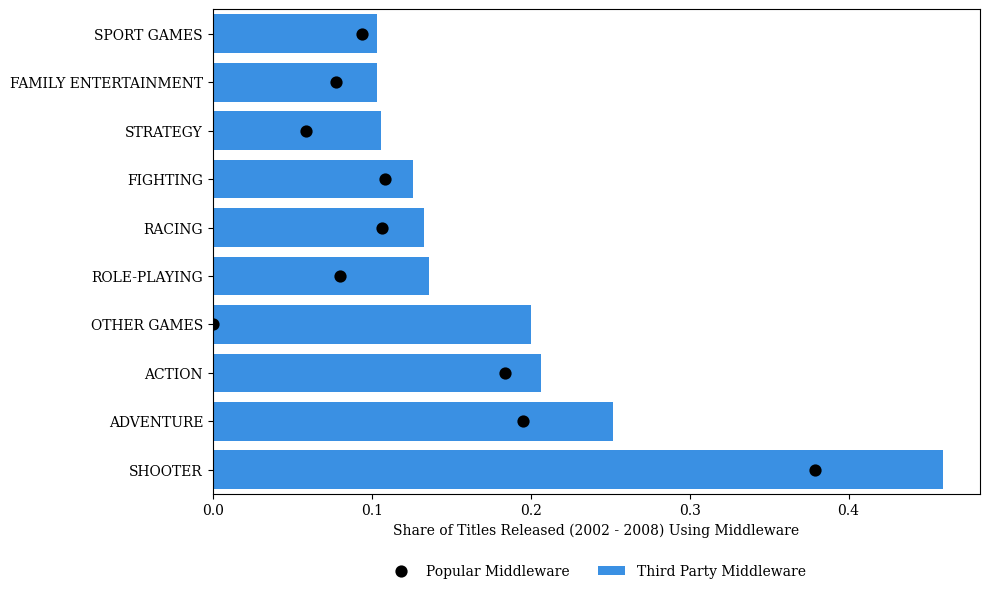

In [5]:
temp = pd.pivot_table(data = df.loc[(df['release_year']>=2002) & (df['release_year']<=2008)], 
                      index ='npd_supergenre', 
                      values = ['MIDDLE', 'PopularMiddleware'], 
                      aggfunc = 'mean').reset_index().sort_values('MIDDLE').tail(10)

plt.figure(figsize=(10, 6))

sns.barplot( data = temp, 
             y = 'npd_supergenre', 
             x = 'MIDDLE', 
             color = 'dodgerblue', 
             label = 'Third Party Middleware')

sns.pointplot( data = temp, 
             y = 'npd_supergenre', 
             x = 'PopularMiddleware', 
             linestyle='none',
             color = 'black', 
             label = 'Popular Middleware',
             errorbar=None)

plt.legend(title=None,
           loc='lower center', 
           bbox_to_anchor=(0.5, -0.2), 
           ncol=2, 
           frameon=False)

plt.xlabel("Share of Titles Released (2002 - 2008) Using Middleware")
plt.ylabel("")

plt.tight_layout()

# Save Figure
plt.savefig(f"{output_dir}/Middleware_Usage_By_Genre.png", dpi=300, bbox_inches='tight')
plt.show()